# fruits를 KNN으로 분류하기

In [1]:
import pandas as pd

fruits = pd.read_csv('../data/fruits.csv')
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


### Feature Set, Target Set을 Numpy의 Array로 변경하기


In [2]:
import numpy as np

In [3]:
# 연습 : numpy의 column stack, row stack
testA = np.array([1,2,3,4])
testB = np.array([10,20,30,40])

In [4]:
# 2개의 array를 묶어서 컬럼 기반으로 하나의 array 만들기
combineA = [[i,j] for i, j in zip(testA, testB)]
print(combineA)

[[1, 10], [2, 20], [3, 30], [4, 40]]


In [6]:
# 다른 방법
combineB = np.column_stack((testA, testB))
print(combineB)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]


In [7]:
combineC = np.row_stack((testA, testB))
print(combineC)

[[ 1  2  3  4]
 [10 20 30 40]]


---

In [13]:
# fruits에서 length, weight를 가져와 array로 만들기
fruit_data = np.column_stack((fruits.length, fruits.weight))
fruit_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [19]:
# fruits에서 length, weight를 가져와 array로 만들기 : Target 
fruit_target = np.array(fruits.name)
fruit_target[:5]

array(['apple', 'apple', 'apple', 'apple', 'apple'], dtype=object)

In [20]:
len(fruit_data) == len(fruit_target)

True

In [15]:
# sklearn으로 train test 분류
from sklearn.model_selection import train_test_split

In [25]:
train_input, test_input, train_target, test_target = train_test_split(fruit_data, fruit_target, stratify=fruit_target, random_state=42)

In [26]:
# knn 학습
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [27]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [28]:
# 정확도 출력하기
kn.score(test_input, test_target)

1.0

---
# 수상한 과일?

In [31]:
kn.predict([[25, 150]])

array(['berry'], dtype=object)

In [29]:
import matplotlib.pyplot as plt

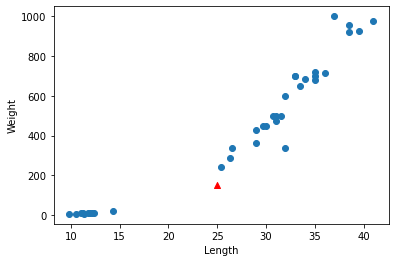

In [32]:
# 산포도 그려보기
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)
plt.scatter(25, 150, marker='^', c='red') # berry 맞나?

plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

> apple 쪽에 가까운데 berry라는 결과가 나옴

In [33]:
# 이웃을 출력해보자
distance, indexes = kn.kneighbors([[25, 150]])
print(indexes)

[[11 20 13 22 15]]


In [35]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

In [38]:
train_target[indexes]

array([['apple', 'berry', 'berry', 'berry', 'apple']], dtype=object)

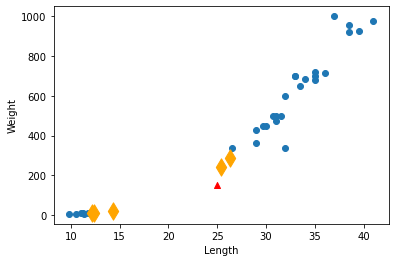

In [37]:
# 산포도로 확인하기
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)
plt.scatter(25, 150, marker='^', c='red')
plt.scatter(train_input[indexes,0], train_input[indexes,1], 150, marker='d', c='orange')

plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

> 축의 단위가 1000 vs 40

---
### 기준을 맞추자

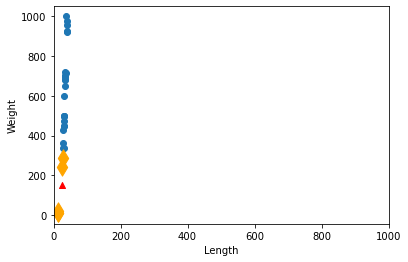

In [39]:
# 산포도로 확인하기
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)
plt.scatter(25, 150, marker='^', c='red')
plt.scatter(train_input[indexes,0], train_input[indexes,1], 150, marker='d', c='orange')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.xlim(0, 1000)

plt.show()

> sample이 length에 거의 영향을 받지 않고, weight에서 영향을 많이 받는다.    
> 차트의 모양대로 현재는 berry로 생각하는것이 맞는 것 같다.

In [43]:
# length와 weight의 평균과 표준편차를 구해서 비교해보자
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [44]:
print(mean,std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


> length와 weight의 차이가 너무 심하다.   
> 표준화 사용

---
### train_data를 표준점수(Z점수)로 변경하자
- 표준점수 = (Feature - 평균) / 표준편차
- 변동계수 = (Feature - 표준편차) / 평균

In [45]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137],
       [ 1.14618873,  1.46805151],
       [-1.49962444, -1.32698425],
       [ 0.50207691,  0.48528979],
       [-1.47980562, -1.32729137],
       [ 0.89845341,  0.83539865],
       [ 0.60117103,  0.79240283],
       [-0.15194433, -0.61417489],
       [ 0.99754754,  1.71374194],
       [-1.44016797, -1.3162353 ],
       [-1.69781269, -1.33681187],
       [-0.06275961, -0.46676063],
       [ 0.79935928,  0.73098022],
       [ 0.40298278,  0.17817675],
       [-1.57889974, -1.32759848],
       [ 0.27416042,  0.02462023],
       [-1.25188913, -1.29688718],
       [ 0.79935928,  0.79240283],
       [-1.45998679, -1.31992065],
       [ 0.45252984,  0.17817675],
       [ 1.39392404,  1.63696368],
       [ 0.6507181 ,  0.63884631],
       [ 0.60117103,  0.79240283],
       [-1.62844681, -1.33435497],
       [-0.04294079,

In [46]:
# sklearn 이용한 방법
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit(train_input)

StandardScaler()

In [49]:
# feature 표준화
train_scaled2 = scaler.transform(train_input)
train_scaled2[0:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### 전처리 데이터로 모델 훈련하기

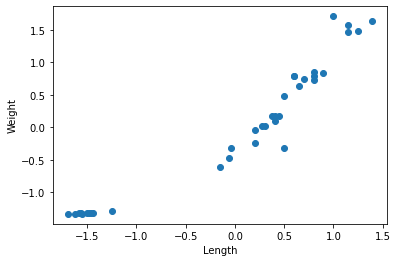

In [50]:
plt.scatter(train_scaled2[:, 0], train_scaled2[:, 1])

plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

> 모양은 같다.   
> 예측할 데이터도 표준점수로 변경해야한다.

In [51]:
new = ([25,150] - mean) / std
new

array([-0.19158198, -0.89671889])

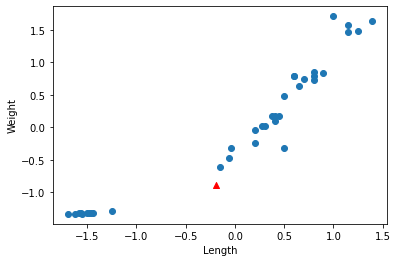

In [52]:
plt.scatter(train_scaled2[:, 0], train_scaled2[:, 1])
plt.scatter(new[0], new[1], marker='^', c='red')

plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()

### KNN으로 분류

In [53]:
# 학습
kn.fit(train_scaled2, train_target)

KNeighborsClassifier()

In [55]:
# 검증데이터도 표준화, *** 중요 : 검증데이터의 평균, 표준편차가 아닌 훈련데이터의 평균, 표준편차를 사용해야 한다.
test_scaled = (test_input - mean) / std
test_scaled

array([[ 0.79935928,  0.86918109],
       [ 0.74981222,  0.54671239],
       [ 1.39392404,  1.56018542],
       [-1.18252324, -1.29627295],
       [-1.38071149, -1.31992065],
       [ 0.6507181 ,  0.51600109],
       [-1.49962444, -1.32667714],
       [ 0.70026516,  0.40851153],
       [-1.61853739, -1.33589053],
       [ 0.89845341,  1.25307238],
       [ 0.30388865, -0.15964759],
       [ 0.50207691,  0.48528979],
       [ 0.27416042,  0.17817675]])

In [56]:
# 정확도 확인
kn.score(test_scaled, test_target)

1.0

In [57]:
# 수상한 과일을 다시 예측하기
print(kn.predict([new]))

['apple']


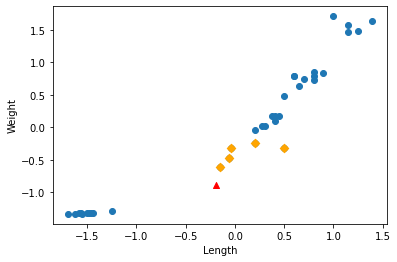

In [58]:
# 확인을 위해 이웃을 출력하자
distance, indexes = kn.kneighbors([new])

plt.scatter(train_scaled2[:, 0], train_scaled2[:, 1])
plt.scatter(new[0], new[1], marker='^', c='red')
plt.scatter(train_scaled2[indexes, 0], train_scaled2[indexes, 1], marker='D', c='orange')

plt.xlabel('Length')
plt.ylabel('Weight')

plt.show()